# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

**Created by:**
- Siti Hajjah Mardiah
- Email : sitihamardiah1997@gmail.com
- Linkedin : https://www.linkedin.com/in/sitihajjahmardiah/

## **📍 Table of Content 📍**
- Business Understanding
    - Problem Statement
    - Goals
    - Objectives
- Data Preparation
    - Data Description
    - Libraries & Datasets
- Data Understanding
    - Exploring Datasets
- Data Preprocessing
    - Feature Engineering
    - Data Types Information
    - Statistical Summary
    - EDA (Exploratory Data Analysis)
- Modelling & Evaluation
    - Indentifying the Number of Clusters
    - Clustering with RFM Analysis
    - Evaluation Model

## **⚙ Work Environment ⚙**

- **Tools**

[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)

- **Programming Language**

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)

- **Dataset**

[Marketing campaign](https://drive.google.com/file/d/1fg5Oh0zoyA_qDMziplBrbiJ-7X7QxYfp/view?usp=sharing)

## **⛳ Business Understanding ⛳**

### **📌 Problem Statement**

The company can develop rapidly when it knows the behavior of its customer personality, so that it can provide better services and benefits to potential customers to become loyal customers. By processing historical marketing campaign data to improve performance and target the right customers so they can transact on the company's platform, from this data insight our focus is to create a cluster prediction model to make it easier for companies to make decisions.

### **📌 Goals**
Creating customer segmentation to find out potential customers according to their behavior with the aim of providing the best treatment for customers so that companies can easily make decisions and improve marketing campaign performance.

### **📌 Objectives**

Creating customer segmentation by cluster prediction model using unsupervised learning to find out potential customers according to their behavior.

## **⛳ Data Preparation ⛳**

### **📌 Data Description**

**Marketing Campaign Dataset [link dataset](https://drive.google.com/file/d/1fg5Oh0zoyA_qDMziplBrbiJ-7X7QxYfp/view?usp=sharing)**

**Dataset Description:**

This dataset contains `2240 samples/rows` and `29 features/columns`, which is each feature can be grouped into several groups including Accepted/Responses Campaign, Customer Information, Sales Product Type, Number of Purchases Type, Cost and Revenue. The following are for more details:

**Accepted/Responses Campaign**

- `AcceptedCmp1` - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2` - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3` - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4` - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5` - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response (target)` - 1 if customer accepted the offer in the last campaign, 0 otherwise
- `Complain` - 1 if customer complained in the previous 2 years

**Customer Information**

- `ID` - Customer's id
- `Year_Birth` - Customer's year of birth
- `Education` - customer’s level of education
- `Marital_Status` - customer’s marital status
- `Income` - customer’s yearly household income
- `Kidhome` - number of small children in customer’s household
- `Teenhome` - number of teenagers in customer’s household
- `DtCustomer` - date of customer’s enrolment with the company
- `Recency` - number of days since the last purchase

**Sales Product Type**

- `MntCoke` - amount spent on cokce products
- `MntFishProducts` - amount spent on fish products
- `MntMeatProducts` - amount spent on meat products
- `MntFruits` - amount spent on fruits products
- `MntSweetProducts` - amount spent on sweet products
- `MntGoldProds` - amount spent on gold products

**Number of Purchases Type**

- `NumDealsPurchases` - number of purchases made with discount
- `NumWebPurchases` - number of purchases made through company’s web site
- `NumCatalogPurchases` - number of purchases made using catalogue
- `NumStorePurchases` - number of purchases made directly in stores
- `NumWebVisitsMonth` - number of visits to company’s web site in the last month

**Cost and Revenue**

- `Z_CostContact = 3` (Cost to contact a customer)
- `Z_Revenue = 11` (Revenue after client accepting campaign)

## **📚 Import Libraries 📚**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

## **📚 Import Dataset 📚**

In [2]:
source = 'dataset/marketing_campaign_data.csv'

df_raw = pd.read_csv(source, index_col = [0])
df_raw.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
954,8146,1976,S2,Bertunangan,46106000.000000,1,1,11-05-2014,84,30000,0,8000,2000,0,14000,1,1,1,2,6,0,0,0,0,0,0,3,11,0
1791,9150,1963,S3,Lajang,48918000.000000,1,1,12-04-2014,21,52000,0,9000,0,0,1000,2,1,0,4,4,0,0,0,0,0,0,3,11,0
596,5252,1969,S1,Cerai,23910000.000000,1,0,26-10-2012,80,16000,12000,18000,7000,1000,13000,1,2,0,3,7,0,0,0,0,0,0,3,11,0
2104,5802,1972,SMA,Menikah,14188000.000000,0,0,28-02-2013,40,2000,7000,11000,16000,12000,27000,1,2,0,4,6,0,0,0,0,0,0,3,11,0
1830,6859,1987,S1,Lajang,29236000.000000,1,0,08-10-2013,30,37000,4000,24000,16000,9000,9000,2,4,0,3,9,0,0,0,0,0,0,3,11,0
861,807,1969,S2,Bertunangan,44602000.000000,1,1,15-02-2014,35,167000,2000,89000,0,0,34000,6,6,1,4,8,0,0,0,0,0,0,3,11,0
1776,7433,1985,S1,Lajang,29760000.000000,1,0,29-08-2012,87,64000,4000,68000,7000,5000,17000,4,3,1,4,8,0,0,0,0,0,0,3,11,0
701,10196,1978,S1,Menikah,71427000.000000,2,0,12-03-2014,26,212000,123000,177000,15000,64000,23000,2,8,2,8,4,0,0,0,0,0,0,3,11,0
1266,5207,1963,S3,Menikah,53378000.000000,1,1,24-09-2012,41,489000,6000,152000,8000,6000,132000,10,9,4,6,8,0,0,0,0,0,0,3,11,1
2150,6950,1958,S2,Menikah,49572000.000000,1,1,15-12-2013,25,35000,1000,16000,0,1000,1000,2,2,0,3,7,0,0,0,0,0,0,3,11,0


# **💡 Data Understanding 💡**

## **📌 Explore Datasets**

### **💉 Basic Datasets Information**

In [3]:
print("Shape of data :", df_raw.shape)
print("Number of rows :", df_raw.shape[0])
print("Number of columns :", df_raw.shape[1])

Shape of data : (2240, 29)
Number of rows : 2240
Number of columns : 29


In [4]:
df_raw.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observations:**

- Dataset has `29 columns` and `2240 rows` data
- There are 3 types of data types namely: `int64, object, float64`
- `Income` column has 2216 non-null values, and `24 null / missing values`

## **📌 Feature Engineering** ##

Creating Features Engineering for these columns:

- Age
- Age Group
- Total Dependents
- Customer Has Children
- Total Spending
- Total Transactions
- Total Accepted Campaign (Accepted Campaign 1-5)
- Ever Accepted Campaign (Accepted Campaign at least 1x)
- Conversion Rate
- Income Segmentation
- Recency Segmentation

### **💉 Age** ###

In [6]:
currentYear = 2023
df_raw['Age'] = currentYear - df_raw['Year_Birth']

### **💉 Age Group** ###

In [7]:
def age_group(x):
    if x < 13:
        group = 'Children'
    elif x < 20:
        group = 'Teenager'
    elif x < 51:
        group = 'Adult'
    else:
        group = 'Elder'
    
    return group

df_raw['Age_group'] = df_raw["Age"].apply(lambda x: age_group(x))

### **💉 Total Dependents** ###

In [8]:
df_raw['Dependents'] = df_raw['Kidhome'] + df_raw['Teenhome']

### **💉 Customer Has Children** ###

In [9]:
df_raw['Has_child'] = np.where(df_raw['Dependents'] > 0, 1, 0)

### **💉 Total Spending** ###

In [10]:
df_raw['TotalSpending'] = df_raw['MntCoke']+ \
                      df_raw['MntFruits']+ \
                      df_raw['MntMeatProducts']+ \
                      df_raw['MntFishProducts']+ \
                      df_raw['MntSweetProducts']+ \
                      df_raw['MntGoldProds']

### **💉 Total Transactions** ###

In [11]:
df_raw['Total_Transactions'] = df_raw['NumDealsPurchases'] + \
                           df_raw['NumWebPurchases'] + \
                           df_raw['NumCatalogPurchases'] + \
                           df_raw['NumStorePurchases']

### **💉 Total Accepted Campaign** ###

In [12]:
df_raw['TotalAccCmpg']= df_raw['AcceptedCmp1'].astype("int64")+ \
                    df_raw['AcceptedCmp2'].astype("int64")+ \
                    df_raw['AcceptedCmp3'].astype("int64")+ \
                    df_raw['AcceptedCmp4'].astype("int64")+ \
                    df_raw['AcceptedCmp5'].astype("int64")

### **💉 Ever Accepted Campaign** ###

In [13]:
df_raw['EverAccCmpg']=df_raw['TotalAccCmpg'].apply(lambda x : 1 if x >= 1 else 0)

### **💉 Conversion Rate** ###

In [14]:
df_raw['ConversionRate'] = np.round(df_raw['Total_Transactions'] / df_raw['NumWebVisitsMonth'], 2)
df_raw['ConversionRate'].fillna(0, inplace=True)
df_raw['ConversionRate'].replace([np.inf, -np.inf], 0, inplace=True)

### **💉 Income Segmentation** ###

In [15]:
Q1 = df_raw["Income"].quantile(.25)
print(Q1)
Q3 = df_raw["Income"].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df_raw["Income_sgmt"] = df_raw["Income"].fillna("None")
df_raw["Income_sgmt"] = df_raw["Income_sgmt"].apply(lambda x: income_sgmt(x))

35303000.0
68522000.0


In [16]:
df_raw["Income_sgmt"].unique()

array(['Medium', 'High', 'Low', 'None'], dtype=object)

### **💉 Recency Segmentation** ###

In [17]:
# Check unique column Recency
np.sort(df_raw['Recency'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [18]:
# Determine the segmentation recency interval per week
# Create Recency Segmentation
def recency_group(x):
    if x < 7:
        group = '1 Week'
    elif x < 14:
        group = '2 Weeks'
    elif x < 21:
        group = '3 Weeks'
    elif x < 28:
        group = '4 Weeks'
    elif x < 35:
        group = '5 Weeks'
    elif x < 42:
        group = '6 Weeks'
    elif x < 49:
        group = '7 Weeks'
    elif x < 56:
        group = '8 Weeks'
    elif x < 63:
        group = '9 Weeks'
    elif x < 70:
        group = '10 Weeks'
    elif x < 77:
        group = '11 Weeks'
    elif x < 84:
        group = '12 Weeks'
    else:
        group = '>12 Weeks'
    
    return group

df_raw['Recency_Sgmt'] = df_raw["Recency"].apply(lambda x: recency_group(x))

In [19]:
df_raw.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Dependents,Has_child,TotalSpending,Total_Transactions,TotalAccCmpg,EverAccCmpg,ConversionRate,Income_sgmt,Recency_Sgmt
1506,851,1972,S2,Menikah,57136000.000000,1,1,09-07-2013,48,306000,5000,109000,21000,109000,92000,9,5,2,10,6,0,0,0,0,0,0,3,11,0,51,Elder,2,1,642000,26,0,0,4.330000,Medium,7 Weeks
302,10812,1978,S3,Menikah,46377000.000000,1,0,01-03-2014,89,37000,0,46000,4000,3000,0,1,2,1,3,4,0,0,0,0,0,0,3,11,0,45,Adult,1,1,90000,7,0,0,1.750000,Medium,>12 Weeks
1443,4530,1948,S2,Janda,78427000.000000,0,0,24-10-2012,36,972000,19000,595000,180000,26000,138000,3,3,7,10,3,0,0,0,1,0,0,3,11,1,75,Elder,0,0,1930000,23,1,1,7.670000,High,6 Weeks
972,10995,1988,D3,Menikah,15716000.000000,1,0,12-11-2012,8,16000,5000,30000,8000,7000,26000,3,3,0,4,8,0,0,0,0,0,1,3,11,0,35,Adult,1,1,92000,10,0,0,1.250000,Low,2 Weeks
1916,2326,1990,S1,Menikah,18929000.000000,0,0,16-02-2013,15,32000,0,8000,23000,4000,18000,1,1,0,4,6,0,0,0,0,0,0,3,11,0,33,Adult,0,0,85000,6,0,0,1.000000,Low,3 Weeks
1969,4331,1978,S2,Bertunangan,85738000.000000,0,0,23-01-2014,41,913000,26000,376000,17000,26000,13000,1,3,6,11,1,0,1,1,0,0,0,3,11,0,45,Adult,0,0,1371000,21,2,1,21.000000,High,6 Weeks
728,11171,1965,S2,Menikah,56962000.000000,2,1,11-10-2013,60,292000,3000,77000,10000,3000,26000,7,6,3,5,7,0,0,0,0,0,0,3,11,0,58,Elder,3,1,411000,21,0,0,3.000000,Medium,9 Weeks
898,7037,1974,S3,Menikah,37087000.000000,1,0,11-08-2013,50,194000,55000,134000,15000,0,3000,3,4,2,8,6,0,0,0,0,0,0,3,11,0,49,Adult,1,1,401000,17,0,0,2.830000,Medium,8 Weeks
583,5123,1951,S2,Menikah,27450000.000000,0,0,15-04-2013,57,37000,12000,23000,8000,11000,52000,1,2,1,3,7,0,0,0,0,0,0,3,11,0,72,Elder,0,0,143000,7,0,0,1.000000,Low,9 Weeks
1299,10641,1978,S1,Lajang,7500000.000000,1,1,27-12-2012,5,6000,5000,4000,13000,4000,25000,4,2,1,3,6,0,0,0,0,0,0,3,11,0,45,Adult,2,1,57000,10,0,0,1.670000,Low,1 Week


# **💡 Exploration Data Analysis (EDA) 💡**

## **📌 Correlation between Conversion Rate and related Attributes which potentially respond to a campaign** ##

For checking correlation, can use several methods:
- Heatmap Correlation
- Diverging Bars
- Marginal Histogram

### **💉 Heatmap Correlation** ###

In [20]:
df_corr = df_raw.copy()

In [21]:
df_corr.drop(['ID', 'Year_Birth', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
               'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Z_CostContact', 'Z_Revenue'],
                inplace=True, axis=1)

In [22]:
df_corr.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Age_group,Dependents,Has_child,TotalSpending,Total_Transactions,TotalAccCmpg,EverAccCmpg,ConversionRate,Income_sgmt,Recency_Sgmt
0,S1,Lajang,58138000.000000,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,66,Elder,0,0,1617000,25,0,0,3.570000,Medium,9 Weeks
1,S1,Lajang,46344000.000000,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,69,Elder,2,1,27000,6,0,0,1.200000,Medium,6 Weeks
2,S1,Bertunangan,71613000.000000,0,0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,58,Elder,0,0,776000,21,0,0,5.250000,High,4 Weeks
3,S1,Bertunangan,26646000.000000,1,0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,39,Adult,1,1,53000,8,0,0,1.330000,Low,4 Weeks
4,S3,Menikah,58293000.000000,1,0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,42,Adult,1,1,422000,19,0,0,3.800000,Medium,>12 Weeks


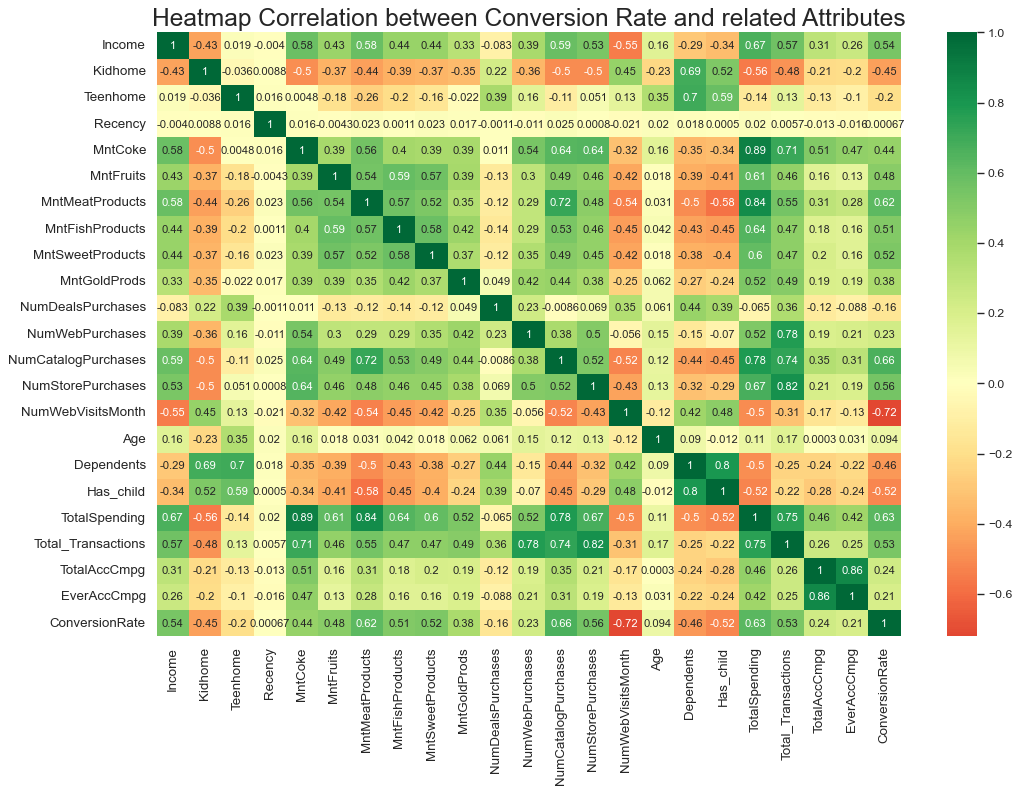

In [23]:
# Plot
plt.figure(figsize=(15,10), dpi= 80)
sns.heatmap(df_corr.corr(), xticklabels=df_corr.corr().columns, yticklabels=df_corr.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Heatmap Correlation between Conversion Rate and related Attributes', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Checking Correlation with Target (Conversion Rate)**

In [24]:
corr = df_corr.corrwith(df_corr["ConversionRate"])
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr.sort_values('corr value', ascending=False, ignore_index=True)

,index,corr value,Corr Type
0,ConversionRate,1.000000,Positif
1,NumWebVisitsMonth,0.721269,Negatif
2,NumCatalogPurchases,0.664412,Positif
3,TotalSpending,0.628536,Positif
4,MntMeatProducts,0.622017,Positif
5,NumStorePurchases,0.555503,Positif
6,Income,0.537599,Positif
7,Total_Transactions,0.532902,Positif
8,MntSweetProducts,0.522903,Positif
9,Has_child,0.518485,Negatif


### **💉 Diverging Bars** ###

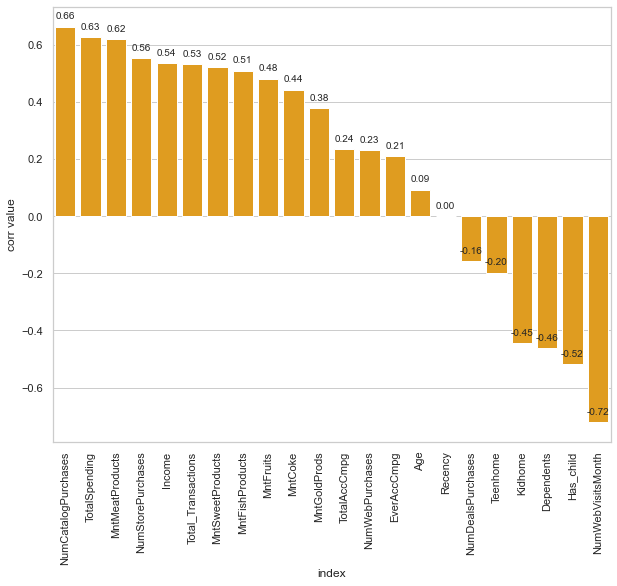

In [25]:
corr = df_corr.corrwith(df_corr["ConversionRate"])
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='orange')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

**Degree of correlation:**

- `Perfect`: If the value is `near ± 1`, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- `High degree`: If the coefficient value lies between `± 0.50 and ± 1`, then it is said to be a strong correlation.
- `Moderate degree`: If the value lies between `± 0.30 and ± 0.49`, then it is said to be a medium correlation.
- `Low degree`: When the value lies below `+ 0.29`, then it is said to be a small correlation.
- `No correlation`: When the value is zero.

[Source](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/#:~:text=High%20degree%3A%20If%20the%20coefficient,to%20be%20a%20small%20correlation.)

**Observations:**

After conducting the analysis to find a correlation between the Conversion Rate and related Attributes using Heatmap and Diverging Bars, the following information is obtained:
- Top 10 attributes that have strong correlation with Conversion Rate (the coefficient value >= 0.5):
    - NumWebVisitsMonth - 0.72 - Negatif
    - NumCatalogPurchases - 0.66 - Positif
    - TotalSpending - 0.62 - Positif
    - MntMeatProducts - 0.62 - Positif
    - NumStorePurchases - 0.55 - Positif
    - Total_Transactions - 0.53 - Positif
    - Income - 0.53 - Positif
    - MntSweetProducts - 0.52 - Positif
    - Has_child - 0.51 - Negatif
    - MntFishProducts - 0.51 - Positif
- In addition, there are several attributes that have a fairly strong correlation with the Conversion Rate (the coefficientlies between 0.30 and 0.49):
    - MntFruits - 0.48 - Positif
    - Dependents - 0.46 - Negatif
    - Kidhome - 0.44 - Negatif
    - MntCoke - 0.44 - Positif
    - MntGoldProds - 0.37 - Positif
    
Based on these results, further analysis can be conducted to visualize the correlation between attributes which are strongly correlated with the Conversion Rate individually using the Marginal Histogram.

### **💉 Marginal Histogram** ###

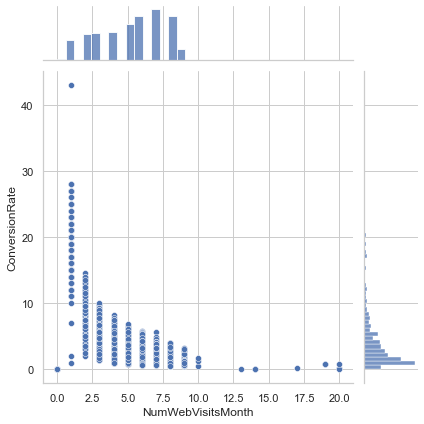

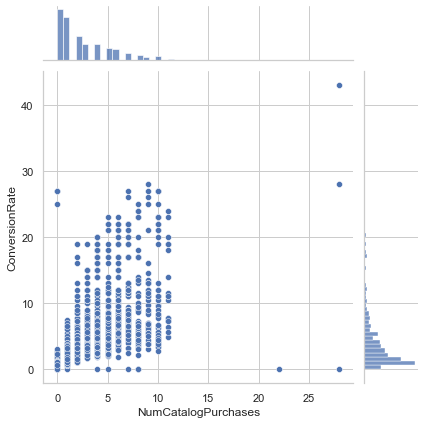

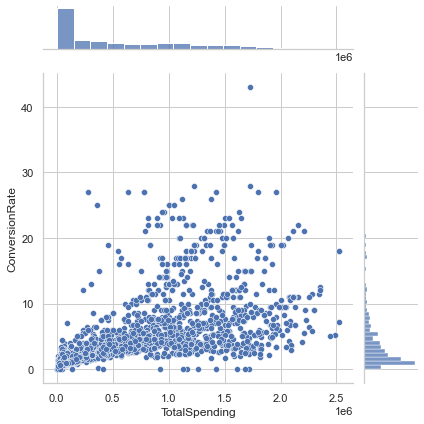

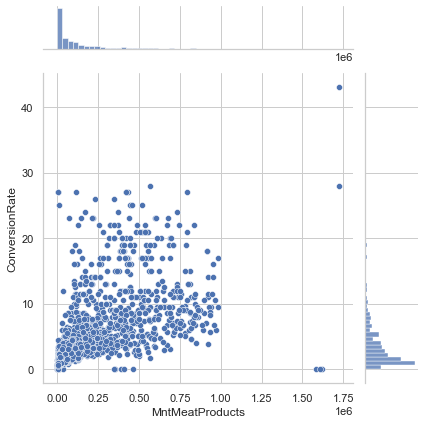

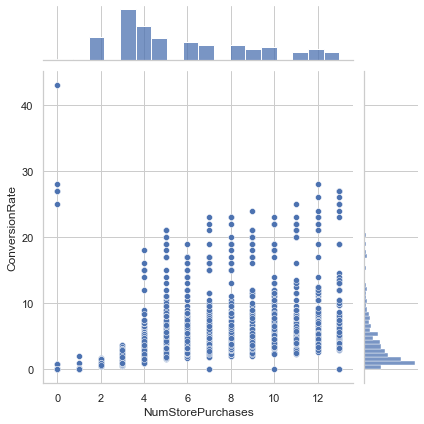

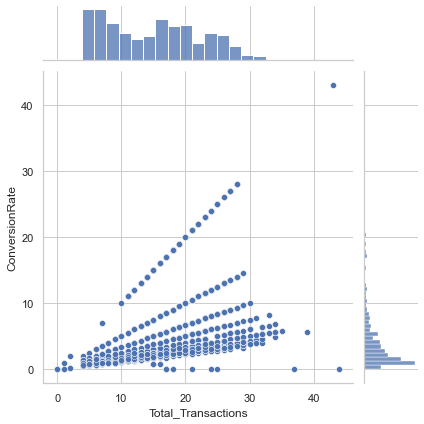

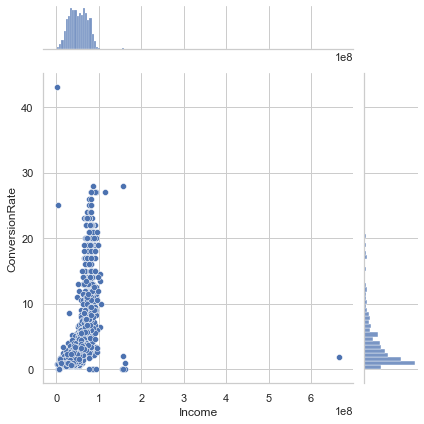

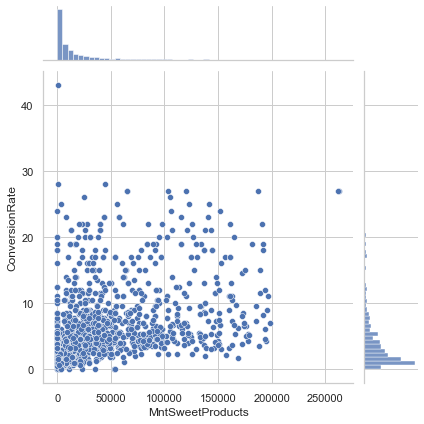

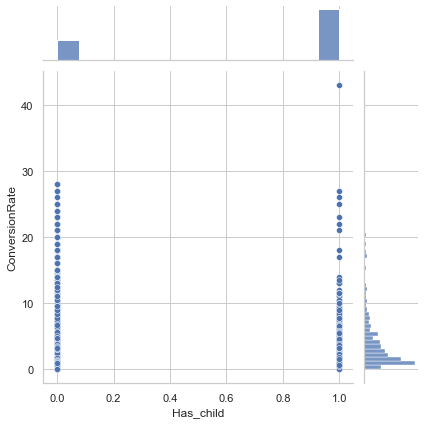

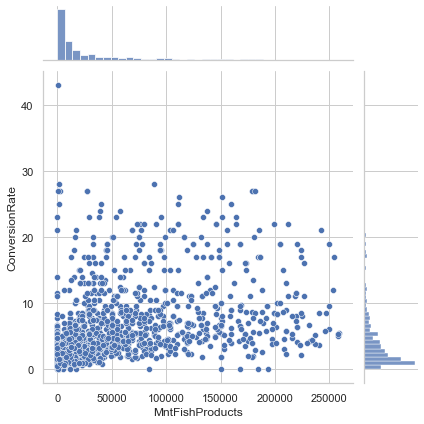

In [26]:
# Top 10 attributes that have strong correlation with Conversion Rate (the coefficient value >= 0.5)

strong_at = ['NumWebVisitsMonth', 'NumCatalogPurchases', 'TotalSpending', 'MntMeatProducts', 'NumStorePurchases',
             'Total_Transactions', 'Income', 'MntSweetProducts', 'Has_child', 'MntFishProducts']

for i in range(0, len(strong_at)):
    sns.jointplot(x=df_corr[strong_at[i]], y=df_corr["ConversionRate"], kind='scatter')
    plt.tight_layout()

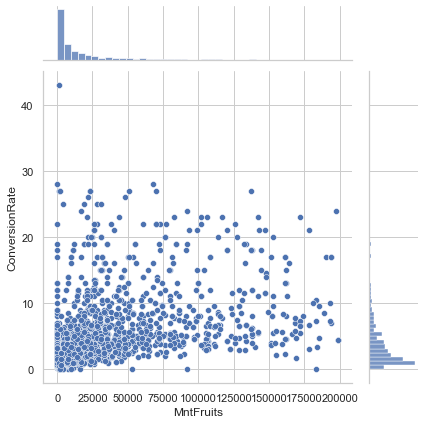

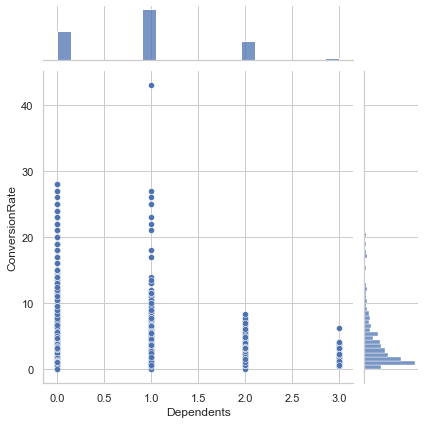

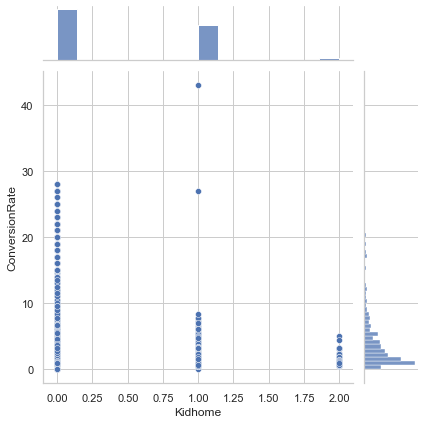

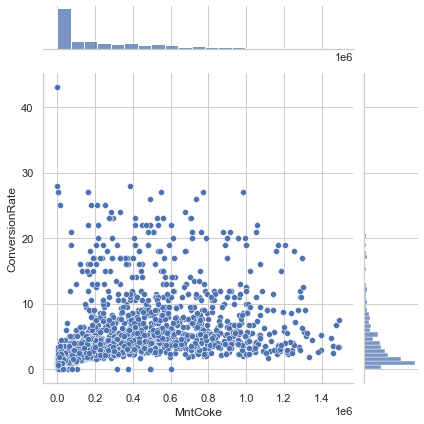

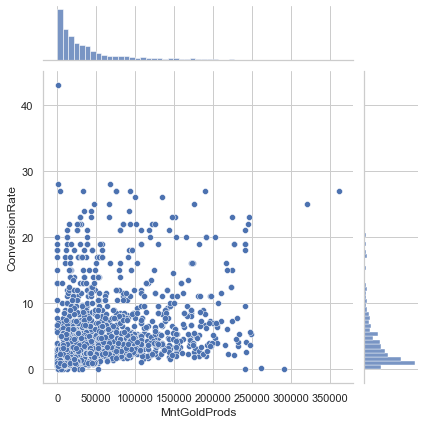

In [27]:
# Top 5 attributes that have fairly strong correlation with Conversion Rate
#(the coefficientlies between 0.30 and 0.49):

strong_at2 = ['MntFruits', 'Dependents', 'Kidhome', 'MntCoke', 'MntGoldProds']

for i in range(0, len(strong_at2)):
    sns.jointplot(x=df_corr[strong_at2[i]], y=df_corr["ConversionRate"], kind='scatter')
    plt.tight_layout()

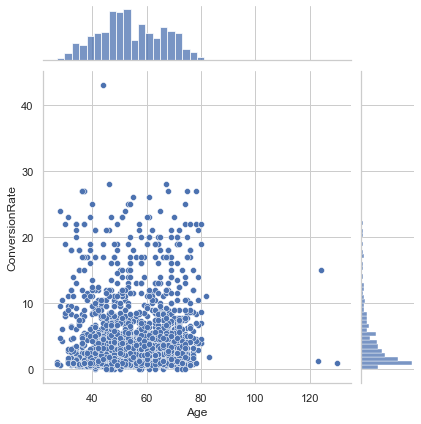

In [28]:
# Correlation between Conversion Rate and Age
sns.jointplot(x=df_corr["Age"], y=df_corr["ConversionRate"], kind='scatter')

### **💉 Insight and Recommendations** ###

**Insights:**
Based on the Heatmap data visualization, it shows that there are several attributes which have strong positive correlation with the Conversion Rate, including TotalSpending, Total_Transactions, Income, NumCatalogPurchases and NumStorePurchases, MntMeatProducts, MntSweetProducts, MntFishProducts, MntFruits, MntCoke and MntGoldProds.

**Recommendations:**
From information above, based on attributes which have strong positive correlation with the conversion rate, 3 conclusions can be drawn:
- Based on customer behavior, there are 3 attributes that most influence the conversion rate, namely TotalSpending, Total_Transactions and Income. Therefore, further marketing campaigns can be implemented for customers who have high TotalSpending, Total_Transactions and Income.
- Based on purchase type, it is recommended that more marketing campaigns be implemented through catalogs and shops.
- Based on the product type, it is recommended that the types of products promoted are Meat Products, Sweet Products, Fish Products, Fruit Products, Coke and Gold Products.

# **⛳ Data Preprocessing ⛳**

## **📌 Checking Data Null and Duplicated Data**

### **💉 Checking Duplicate Rows**

In [29]:
df_raw[df_raw.duplicated(keep=False)].sort_values(by=list(df_raw.columns.values))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Dependents,Has_child,TotalSpending,Total_Transactions,TotalAccCmpg,EverAccCmpg,ConversionRate,Income_sgmt,Recency_Sgmt


In [30]:
df_raw.duplicated().sum()

0

In [31]:
df_raw.duplicated(subset=["ID"]).sum()

0

In [32]:
print(f"Data Frame Dimension Before Duplicate Removal: {df_raw.shape}")
df_raw = df_raw.drop_duplicates().reset_index(drop=True)
print(f"Data Frame Dimension After Duplicate Removal: {df_raw.shape}")

Data Frame Dimension Before Duplicate Removal: (2240, 40)
Data Frame Dimension After Duplicate Removal: (2240, 40)


**Observation:**

There is no duplicated data in this dataset

### **💉 Checking Missing Values**

In [33]:
df_raw.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Age_group               0
Dependents              0
Has_child               0
TotalSpending           0
Total_Transactions      0
TotalAccCmpg            0
EverAccCmpg             0
ConversionRate          0
Income_sgmt 

In [34]:
print('Missing values status:', df_raw.isnull().values.any())
nvc = pd.DataFrame(df_raw.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_raw.shape[0])*100
nvc["Data Type"] = [df_raw[col].dtype for col in df_raw.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(nvc)

Missing values status: True
                     Total Null Values  Percentage Data Type
Income                              24    1.071429    object
ID                                   0    0.000000     int64
AcceptedCmp5                         0    0.000000     int64
AcceptedCmp1                         0    0.000000    object
AcceptedCmp2                         0    0.000000    object
Complain                             0    0.000000   float64
Z_CostContact                        0    0.000000     int64
Z_Revenue                            0    0.000000     int64
Response                             0    0.000000    object
AcceptedCmp4                         0    0.000000     int64
Age                                  0    0.000000     int64
Dependents                           0    0.000000     int64
Has_child                            0    0.000000     int64
TotalSpending                        0    0.000000     int64
Total_Transactions                   0    0.000000     in

**Observations:**
- `Income` column has `24 null / missing values`, a proportion of 1.07% of the total data 

## **📌 Handling Missing Value**

Based on the results of the previous analysis, it is known that there are `24 rows` of empty data in the `income` column with a percentage of 1.07% of the total data.

For handling missing values for the `Income` column, using imputation with Median, due to Highly Positively Skewed

In [35]:
print("Number of missing values in Income column before Imputation =", df_raw["Income"].isna().sum())

df_raw['Income'].fillna(df_raw['Income'].median(), inplace=True)
print("Number of missing values in Income column after Imputation =", df_raw["Income"].isna().sum())

Number of missing values in Income column before Imputation = 24
Number of missing values in Income column after Imputation = 0


In [36]:
df_raw.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Age_group              0
Dependents             0
Has_child              0
TotalSpending          0
Total_Transactions     0
TotalAccCmpg           0
EverAccCmpg            0
ConversionRate         0
Income_sgmt            0
Recency_Sgmt           0


**Observation:**

Missing values in `Income` column has been handled successfully, proven by there is no null values after data filling.

## **📌 Drop Unnecessary Feature**

Following are some of the columns that need to be dropped:

- Drop `ID` column as it has multiple categories and is not useful for modeling
- Drop `Year_Birth` column because feature extraction has been done to retrieve `Age` data
- Drop `Dt_Customer` column because it is not needed for modeling
- Drop column `Z_CostContact`, `Z_Revenue` because it only has one value, it doesn't provide significant information to the prediction model
- Drop `Complain` column because it is not needed for modeling
- Drop the `Kidhome` and `Teenhome` columns because the `Has_child` and `Dependents` features already exist to replace them
- Drop the `AcceptedCmp1-5` and `response` fields because there are engineering features `TotalAccCmpg` and `ConversionRate` as replacement features

In [37]:
df = df_raw.copy()

In [38]:
df.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Complain', 'Kidhome', 'Teenhome',
        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], inplace=True, axis=1)
df.head()

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Age_group,Dependents,Has_child,TotalSpending,Total_Transactions,TotalAccCmpg,EverAccCmpg,ConversionRate,Income_sgmt,Recency_Sgmt
0,S1,Lajang,58138000.000000,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,66,Elder,0,0,1617000,25,0,0,3.570000,Medium,9 Weeks
1,S1,Lajang,46344000.000000,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,69,Elder,2,1,27000,6,0,0,1.200000,Medium,6 Weeks
2,S1,Bertunangan,71613000.000000,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,58,Elder,0,0,776000,21,0,0,5.250000,High,4 Weeks
3,S1,Bertunangan,26646000.000000,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,39,Adult,1,1,53000,8,0,0,1.330000,Low,4 Weeks
4,S3,Menikah,58293000.000000,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,42,Adult,1,1,422000,19,0,0,3.800000,Medium,>12 Weeks


## **📌 Feature Encoding**

In [39]:
#cek unique value for feature encoding categorical columns
for x in df: 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== Education =====
['S1', 'S3', 'S2', 'SMA', 'D3']

===== Marital_Status =====
['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda']

===== Income =====
[58138000.0, 46344000.0, 71613000.0, 26646000.0, 58293000.0, 62513000.0, 55635000.0, 33454000.0, 30351000.0, 5648000.0, '.....']

===== Recency =====
[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, '.....']

===== MntCoke =====
[635000, 11000, 426000, 173000, 520000, 235000, 76000, 14000, 28000, 5000, '.....']

===== MntFruits =====
[88000, 1000, 49000, 4000, 43000, 42000, 65000, 10000, 0, 5000, '.....']

===== MntMeatProducts =====
[546000, 6000, 127000, 20000, 118000, 98000, 164000, 56000, 24000, 11000, '.....']

===== MntFishProducts =====
[172000, 2000, 111000, 10000, 46000, 0, 50000, 3000, 1000, 11000, '.....']

===== MntSweetProducts =====
[88000, 1000, 21000, 3000, 27000, 42000, 49000, 2000, 112000, 5000, '.....']

===== MntGoldProds =====
[88000, 6000, 42000, 5000, 15000, 14000, 27000, 23000, 2000, 13000, '.....']

===== N

**Observation:**

Based on the result above, there are 5 columns need to be changed using Label Encoding:

Label Encoding:
- `Education` => 'S1', 'S3', 'S2', 'SMA', 'D3'
- `Age_group` => 'Elder', 'Adult'
- `Income_sgmt` => 'Medium', 'High', 'Low', 'None'
- `Recency_Sgmt`=> '1 Week - >12 Weeks'
- `Marital_Status`, need to be simplified

Reason why all string variable type using Label Encoding is to reduce features addition.

### **💉 Label Encoding**

In [40]:
#Education
map_edu = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df['Education'] = df['Education'].map(map_edu)
df['Education'].unique()

array([2, 4, 3, 0, 1], dtype=int64)

In [41]:
#Age_group
map_agegroup = {
    'Adult' : 0,
    'Elder' : 1
}

df['Age_group'] = df['Age_group'].map(map_agegroup)
df['Age_group'].unique()

array([1, 0], dtype=int64)

In [42]:
#Income_sgmt
map_Income_sgmt = {
    'None' : 0,
    'Low' : 1,
    'Medium' : 2,
    'High' : 3
}

df['Income_sgmt'] = df['Income_sgmt'].map(map_Income_sgmt)
df['Income_sgmt'].unique()

array([2, 3, 1, 0], dtype=int64)

In [43]:
#Recency_Sgmt
map_Recency_Sgmt = {
    '1 Week' : 0,
    '2 Weeks' : 1,
    '3 Weeks' : 2,
    '4 Weeks' : 3,
    '5 Weeks' : 4,
    '6 Weeks' : 5,
    '7 Weeks' : 6,
    '8 Weeks' : 7,
    '9 Weeks' : 8,
    '10 Weeks' : 9,
    '11 Weeks' : 10,
    '12 Weeks' : 11,
    '>12 Weeks' : 12
}

df['Recency_Sgmt'] = df['Recency_Sgmt'].map(map_Recency_Sgmt)
df['Recency_Sgmt'].unique()

array([ 8,  5,  3, 12,  2,  4,  9,  1, 11,  7,  6,  0, 10], dtype=int64)

Before performing Label Encoding, it is necessary to simplify values that have the same meaning:
- Single = 'Lajang'
- Couple = 'Bertunangan', 'Menikah'
- Divorce = 'Cerai', 'Janda', 'Duda'

In [44]:
df['Marital_Status'] = df['Marital_Status'].replace(['Lajang'],'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Bertunangan', 'Menikah'],'Couple')
df['Marital_Status'] = df['Marital_Status'].replace(['Cerai', 'Janda', 'Duda'],'Divorce')
df['Marital_Status'].unique()

array(['Single', 'Couple', 'Divorce'], dtype=object)

In [45]:
#Marital_Status
map_Marital_Status = {
    'Divorce' : 0,
    'Single' : 1,
    'Couple' : 2
}

df['Marital_Status'] = df['Marital_Status'].map(map_Marital_Status)
df['Marital_Status'].unique()

array([1, 2, 0], dtype=int64)

In [46]:
df[['Education', 'Marital_Status', 'Age_group', 'Income_sgmt', 'Recency_Sgmt']].sample(10)

,Education,Marital_Status,Age_group,Income_sgmt,Recency_Sgmt
1512,2,2,1,3,12
221,2,2,1,3,8
1823,2,2,1,2,8
1151,2,2,1,2,12
1381,1,2,1,2,10
449,4,2,1,2,12
1019,2,1,0,1,3
704,3,0,1,2,3
1771,4,2,1,2,12
701,2,2,0,3,3


In [47]:
df.describe()

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Age_group,Dependents,Has_child,TotalSpending,Total_Transactions,TotalAccCmpg,EverAccCmpg,ConversionRate,Income_sgmt,Recency_Sgmt
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.460268,1.505357,52237975.446429,49.109375,303935.714286,26302.232143,166950.000000,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,54.194196,0.588839,0.950446,0.715179,605798.214286,14.862054,0.297768,0.206696,4.395170,1.978571,6.492857
std,1.004337,0.727172,25037955.890622,28.962453,336597.392605,39773.433765,225715.372512,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,11.984069,0.492154,0.751803,0.451430,602249.288011,7.677173,0.678381,0.405026,4.913677,0.732994,3.987804
min,0.000000,0.000000,1730000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,35538750.000000,24.000000,23750.000000,1000.000000,16000.000000,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,46.000000,0.000000,0.000000,0.000000,68750.000000,8.000000,0.000000,0.000000,1.220000,1.000000,3.000000
50%,2.000000,2.000000,51381500.000000,49.000000,173500.000000,8000.000000,67000.000000,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,53.000000,1.000000,1.000000,1.000000,396000.000000,15.000000,0.000000,0.000000,2.600000,2.000000,7.000000
75%,3.000000,2.000000,68289750.000000,74.000000,504250.000000,33000.000000,232000.000000,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,64.000000,1.000000,1.000000,1.000000,1045500.000000,21.000000,0.000000,0.000000,5.347500,2.000000,10.000000
max,4.000000,2.000000,666666000.000000,99.000000,1493000.000000,199000.000000,1725000.000000,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,130.000000,1.000000,3.000000,1.000000,2525000.000000,44.000000,4.000000,1.000000,43.000000,3.000000,12.000000


## **📌 Clustering with RFM Analysis**

In [48]:
#pip install associations

In [49]:
#pip install dython --user

In [50]:
from dython.nominal import associations

In [51]:
df_clus = df.copy()

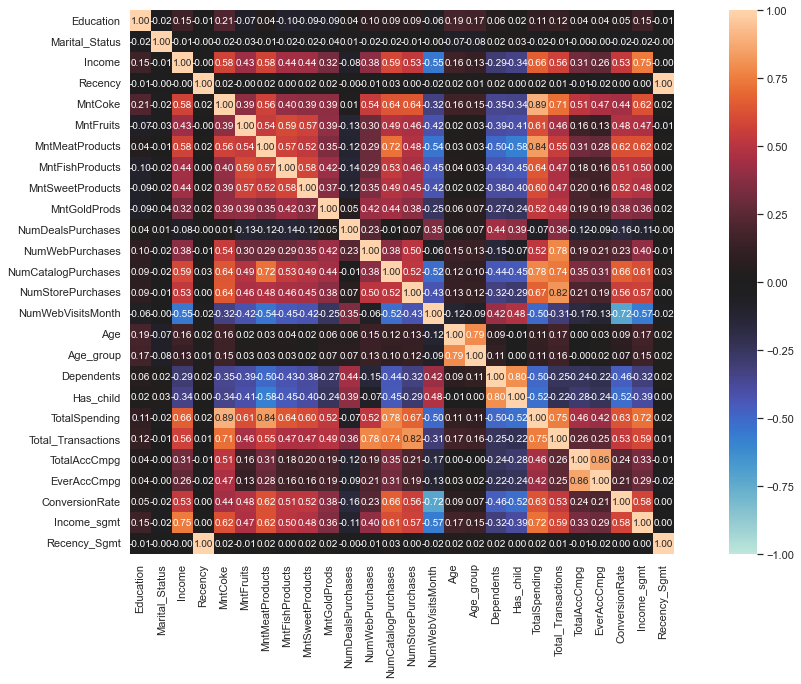

In [52]:
fig, ax = plt.subplots(figsize=(20, 10))
associations(df_clus, ax=ax);

Column to be selected based on RFM with reduce dimensionality method:

- Recency: Recency
- Frecuency: Total_Transactions
- Monetary: TotalSpending

In [53]:
df_rd = df_clus.copy()
df_rd = df_rd[['Recency', 'Total_Transactions', 'TotalSpending']]
df_rd.columns = ['R', 'F', 'M']
df_rd.describe(include='all')

,R,F,M
count,2240.000000,2240.000000,2240.000000
mean,49.109375,14.862054,605798.214286
std,28.962453,7.677173,602249.288011
min,0.000000,0.000000,5000.000000
25%,24.000000,8.000000,68750.000000
50%,49.000000,15.000000,396000.000000
75%,74.000000,21.000000,1045500.000000
max,99.000000,44.000000,2525000.000000


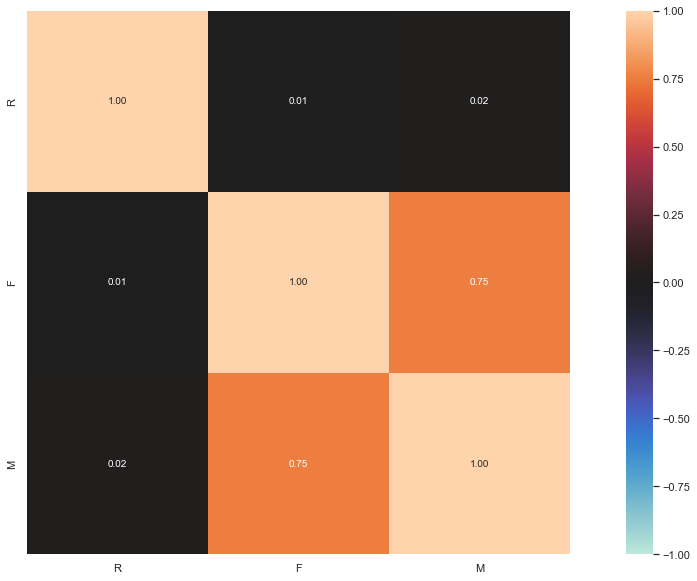

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))
associations(df_rd, ax=ax);

### **💉 Check Outliers and Handling Outliers** ###

**Check Outliers**

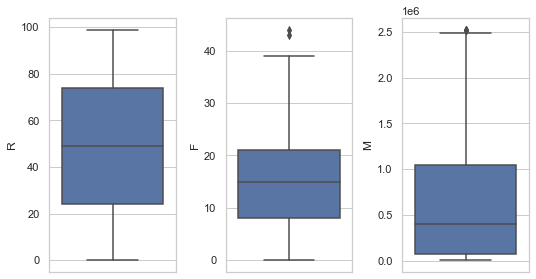

In [55]:
cols = df_rd.columns
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df_rd[cols[i]], orient='v')
    plt.tight_layout()

**Observation:**

There are 2 features have outliers:
- Total_Transactions
- TotalSpending

Next, we need to conduct handling data outlier for Total_Transactions and  TotalSpending

**Handling Outliers**

In [56]:
for col in cols:
    high_cut = df_rd[col].quantile(q=0.99)
    low_cut= df_rd[col].quantile(q=0.01)
    df_rd.loc[df_rd[col]>high_cut,col]=high_cut
    df_rd.loc[df_rd[col]<low_cut,col]=low_cut

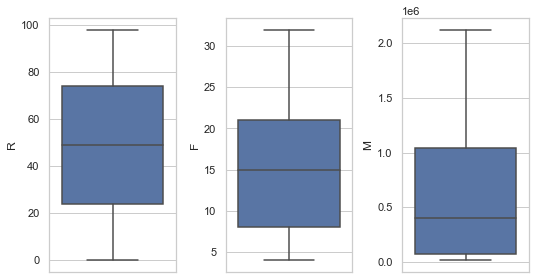

In [57]:
cols = df_rd.columns
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df_rd[cols[i]], orient='v')
    plt.tight_layout()

**Observation:**

Total_Transactions and TotalSpending are successfully handled

### **💉 Check and Handling Data Distribution** ###

**Check Data Distribution**

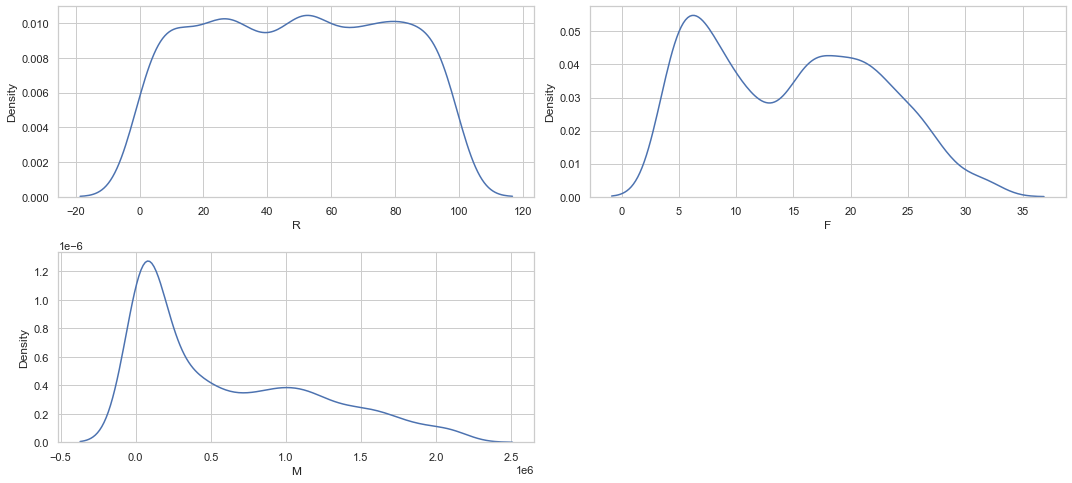

In [58]:
cols = df_rd.columns

plt.figure(figsize= (15, 20))
for i in range(len(cols)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x = df_rd[cols[i]])
    plt.tight_layout()

**Observation:**

Based on data distribution on 'Recency', 'Total_Transactions', 'TotalSpending', can get the insights that:
- Recency (R) distributes normally
- Total_Transactions (F) distributes normally
- TotalSpending (M) distributes tent to righ side or positif skewed

Next, we need to conduct feature transformation for Total_Transactions and  TotalSpending

**Handling Data Distribution (Feature Transformation)**

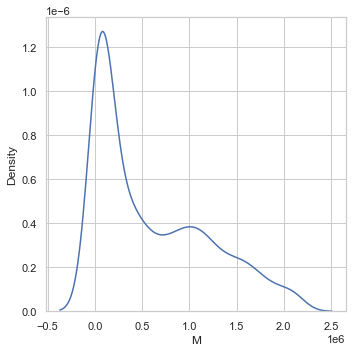

In [59]:
#column M distribution is right-skewed

plt.figure(figsize= (5, 5))
sns.kdeplot(x = df_rd['M'])
plt.tight_layout()

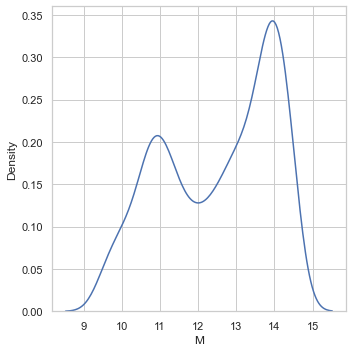

In [60]:
#log tranformation on column `M`

df_rd_log = df_rd.copy()
df_rd_log['M'] = np.log(df_rd['M'])

plt.figure(figsize= (5, 5))
sns.kdeplot(x = df_rd_log['M'])
plt.tight_layout()

In [61]:
df_rd_log.describe()

,R,F,M
count,2240.000000,2240.000000,2240.000000
mean,49.101786,14.854911,12.520340
std,28.949501,7.591392,1.475319
min,0.000000,4.000000,9.472705
25%,24.000000,8.000000,11.138212
50%,49.000000,15.000000,12.889169
75%,74.000000,21.000000,13.860005
max,98.000000,32.000000,14.569753


In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [63]:
col_name = list(df_rd_log.columns)

mm = MinMaxScaler()
df_std_mm = mm.fit_transform(df_rd_log)
df_std_mm = pd.DataFrame(df_std_mm, columns=col_name)
df_std_mm.sample(10)

,R,F,M
689,0.030612,0.392857,0.860472
616,0.959184,0.071429,0.194308
1919,0.734694,0.000000,0.094088
1828,0.938776,0.714286,0.948240
1466,0.459184,0.607143,0.747172
599,0.581633,0.214286,0.354028
2215,0.897959,0.000000,0.040737
411,0.510204,0.464286,0.834596
1115,0.714286,0.357143,0.941020
1077,0.102041,0.071429,0.103215


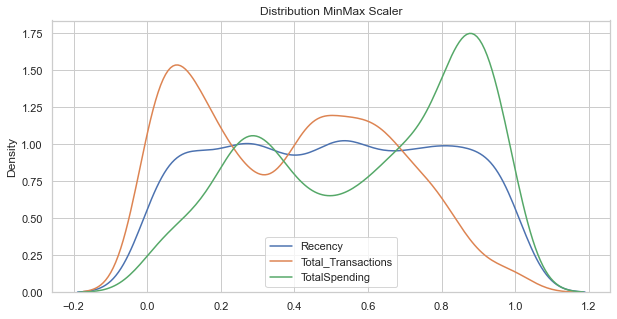

In [64]:
plt.figure(figsize=(10, 5))
plt.title('Distribution MinMax Scaler')
sns.kdeplot(df_std_mm['R'], label = 'Recency')
sns.kdeplot(df_std_mm['F'], label = 'Total_Transactions')
sns.kdeplot(df_std_mm['M'], label = 'TotalSpending')
plt.xlabel(None)
plt.legend()
plt.show()

In [65]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_std_mm.describe()

,R,F,M
count,2240.000,2240.000,2240.000
mean,0.501,0.388,0.598
std,0.295,0.271,0.289
min,0.000,0.000,0.000
25%,0.245,0.143,0.327
50%,0.500,0.393,0.670
75%,0.755,0.607,0.861
max,1.000,1.000,1.000


# **⛳ Clustering Model ⛳**

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.

Distortion is calculated as the average of the squared distances (let’s say Euclidean distance) from the cluster centers of the respective clusters. Inertia represents the sum of squared distances of samples to their closest cluster center.

## **📌 Elbow Method** ##

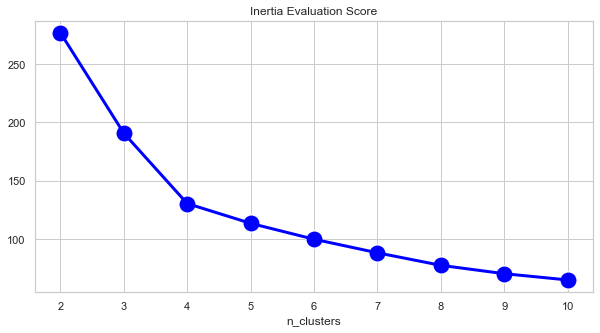

In [66]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std_mm)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.title('Inertia Evaluation Score')
sns.lineplot(x=range(2, 11), y=inertia, color='blue', linewidth = 3)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='blue')
plt.xlabel('n_clusters')
plt.show()

**Observation:**

Based on the results of determining the number of clusters using the elbow method, the changes did not change significantly in the 4 clusters, so they will be divided into 4 clusters.

In [67]:
#pip install PREDICT

In [68]:
#!pip install scikit-learn-extra

In [69]:
#pip install -U threadpoolctl

## **📌 Silhoutte Score** ##

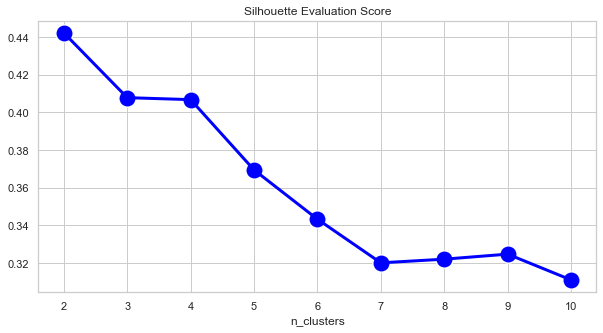

In [70]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std_mm)
    preds = kmeans.predict(df_std_mm)
    score_euclidean = silhouette_score(df_std_mm, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Silhouette Evaluation Score')
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='blue', linewidth = 3)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='blue')
plt.xlabel('n_clusters')
plt.show()

**Observations**

Based on visualization above, n_cluster = 4 is an optimal number for K-Means Clustering in this dataset

## **📌 K-Means Clustering**

In [71]:
df_std_cluster = df_std_mm.copy()
df_cluster = df_rd.copy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std_mm)
df_std_cluster['clusters'] = kmeans.labels_
df_cluster['clusters'] = kmeans.labels_

In [72]:
df_cluster.sample(10)

,R,F,M,clusters
1914,24,31,1198000,1
1404,39,26,727000,1
2014,31,25,1655000,1
1576,4,8,147000,0
1017,72,11,236000,3
825,51,24,1576000,2
1329,3,17,1196000,1
162,91,11,121000,3
853,43,6,35000,0
1589,33,25,1682000,1


In [73]:
pca = PCA(n_components=2)

pca.fit(df_std_mm)
pcs = pca.transform(df_std_mm)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = df_cluster['clusters']
df_pca.sample(10)

,PC 1,PC 2,clusters
1002,-0.307,0.254,1
803,-0.518,0.433,1
1785,0.039,0.296,1
2140,0.608,0.222,0
1178,0.295,-0.241,3
1017,0.109,-0.237,3
302,0.341,-0.416,3
2224,-0.298,0.264,1
963,0.124,-0.359,3
1197,-0.299,0.395,1


<Axes: title={'center': '2-D Visualization of Customer Clusters\nWith PCA'}, xlabel='PC 1', ylabel='PC 2'>

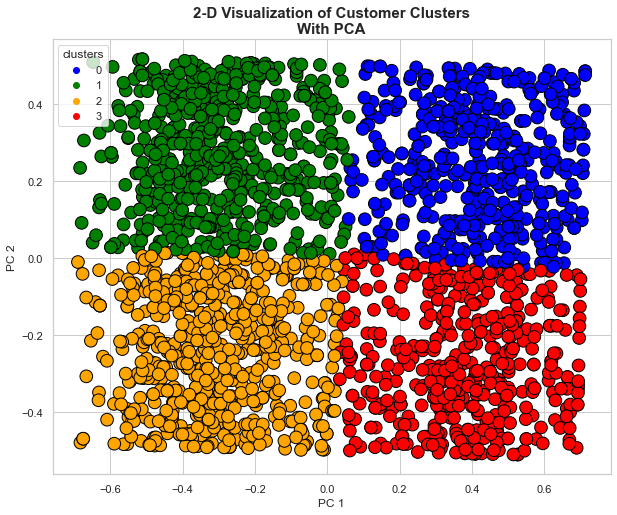

In [121]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters\nWith PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['blue','green','orange','red'],
    s=160,
    ax=ax
)

**Observation**

Based on visualization above, there is clearly 4 clusters that generated by K-Means Clustering algorithm using RFM Method for this dataset.

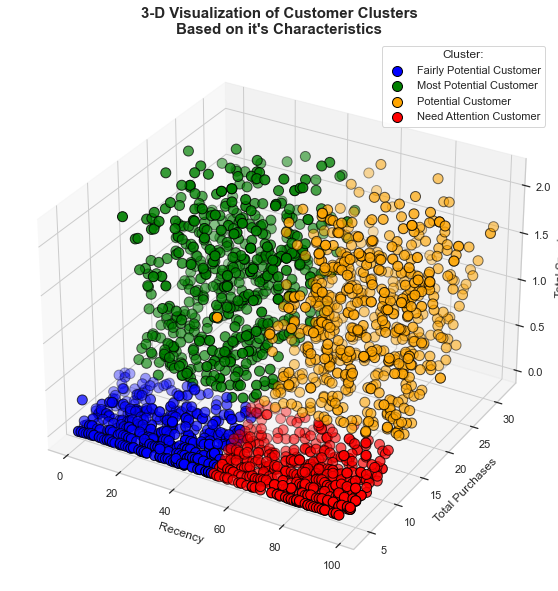

In [123]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(df_cluster['R'][df_cluster.clusters == 0], df_cluster['F'][df_cluster.clusters == 0], df_cluster['M'][df_cluster.clusters == 0], c='blue', s=100, edgecolor='black', label='Fairly Potential Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 1], df_cluster['F'][df_cluster.clusters == 1], df_cluster['M'][df_cluster.clusters == 1], c='green', s=100, edgecolor='black', label='Most Potential Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 2], df_cluster['F'][df_cluster.clusters == 2], df_cluster['M'][df_cluster.clusters == 2], c='orange', s=100, edgecolor='black', label='Potential Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 3], df_cluster['F'][df_cluster.clusters == 3], df_cluster['M'][df_cluster.clusters == 3], c='red', s=100, edgecolor='black', label='Need Attention Customer')
plt.xlabel('Recency')
plt.ylabel('Total Purchases')
ax.set_zlabel('Total Spent')
plt.legend(title='Cluster:')
plt.show()

In [76]:
display(df_cluster.groupby('clusters').agg(['mean','median', 'max', 'min']))

R                     F                          M             \
           mean median max min   mean median max min        mean     median   
clusters                                                                      
0        24.581 24.500  50   0  7.209  7.000  15   4   76526.316  57000.000   
1        23.311 24.000  48   0 20.663 20.000  32  10  992952.998 960000.000   
2        73.343 72.000  98  49 20.498 20.000  32   4 1016844.615 976000.000   
3        74.716 76.000  98  48  7.601  7.000  15   4   87073.069  63000.000   

                           
              max     min  
clusters                   
0          373000   13000  
1         2126000  221000  
2         2126000  178000  
3          331000   13000

In [77]:
df_tc = df_cluster.groupby('clusters').agg({'R':'count'}).reset_index()
df_tc = df_tc.rename(columns={'R':'total_customers'})
df_tc['sum_customers'] = df_tc['total_customers'].sum()
df_tc['pct'] = round((df_tc['total_customers']/df_tc['sum_customers'])*100, 2)
df_tc

,clusters,total_customers,sum_customers,pct
0,0,494,2240,22.050
1,1,617,2240,27.540
2,2,650,2240,29.020
3,3,479,2240,21.380


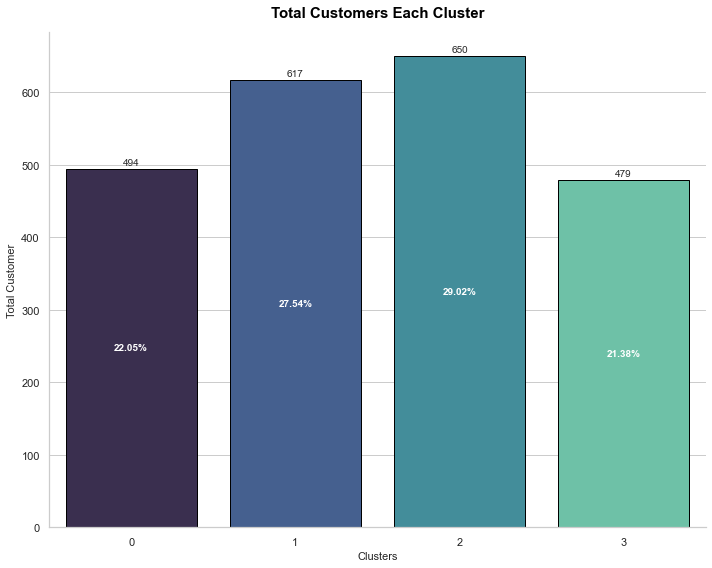

In [127]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title("Total Customers Each Cluster", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='clusters', y='total_customers', data=df_tc, edgecolor='black', palette='mako')

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['22.05%', '27.54%', '29.02%', '21.38%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

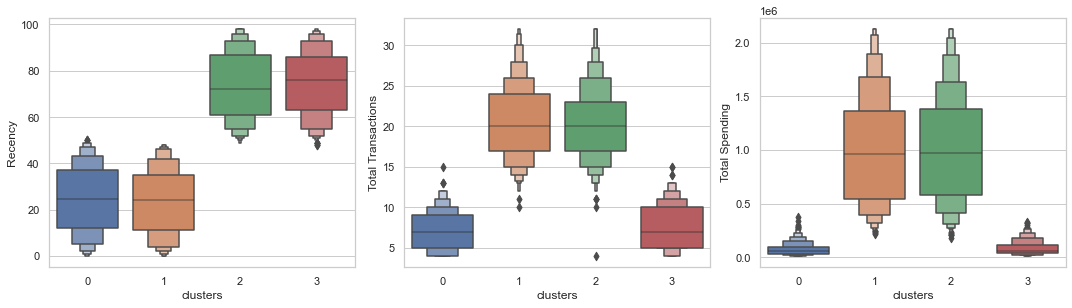

In [79]:
df_clust = df_cluster.copy()
df_clust.rename(columns={'R':'Recency','F':'Total Transactions','M':'Total Spending'}, inplace=True)
clust = df_clust.columns.drop('clusters')

plt.figure(figsize= (15, 8))
for i in range(len(clust)):
    plt.subplot(2, 3, i+1)
    sns.boxenplot(x=df_cluster['clusters'], y=df_clust[clust[i]])
    plt.tight_layout()

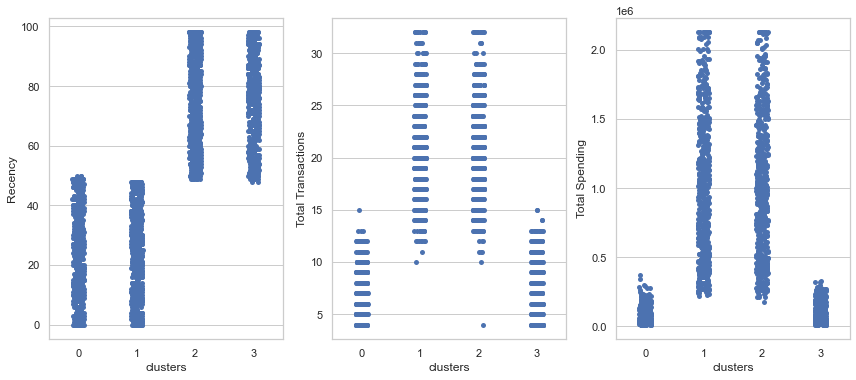

In [80]:
df_clust = df_cluster.copy()
df_clust.rename(columns={'R':'Recency','F':'Total Transactions','M':'Total Spending'}, inplace=True)
clust = df_clust.columns.drop('clusters')

plt.figure(figsize= (12, 10))
for i in range(len(clust)):
    plt.subplot(2, 3, i+1)
    sns.stripplot(x=df_cluster['clusters'], y=df_clust[clust[i]])
    plt.tight_layout()

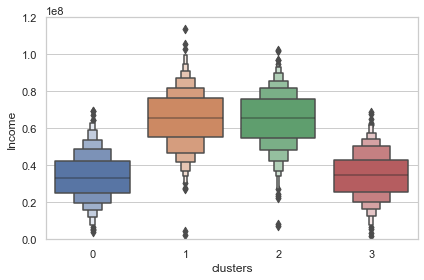

In [81]:
plt.figure(figsize= (6, 4))
sns.boxenplot(x=df_cluster['clusters'], y=df['Income'])
plt.ylim(0, 120000000)
plt.tight_layout()

In [85]:
df_raw['Clusters'] = kmeans.labels_
df_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Dependents,Has_child,TotalSpending,Total_Transactions,TotalAccCmpg,EverAccCmpg,ConversionRate,Income_sgmt,Recency_Sgmt,Clusters
0,5524,1957,S1,Lajang,58138000.000,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Elder,0,0,1617000,25,0,0,3.570,Medium,9 Weeks,2
1,2174,1954,S1,Lajang,46344000.000,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Elder,2,1,27000,6,0,0,1.200,Medium,6 Weeks,0
2,4141,1965,S1,Bertunangan,71613000.000,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Elder,0,0,776000,21,0,0,5.250,High,4 Weeks,1
3,6182,1984,S1,Bertunangan,26646000.000,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Adult,1,1,53000,8,0,0,1.330,Low,4 Weeks,0
4,5324,1981,S3,Menikah,58293000.000,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Adult,1,1,422000,19,0,0,3.800,Medium,>12 Weeks,2


In [86]:
df_age_clust = df_raw.groupby(['Clusters', 'Age_group']).agg({'Education':'count'}).reset_index()
df_age_clust = df_age_clust.rename(columns={'Education':'total_customers'})
df_age_clust['sum_customers'] = df_age_clust['total_customers'].sum()
df_age_clust['pct'] = round((df_age_clust['total_customers']/df_age_clust['sum_customers'])*100, 2)
df_age_clust

,Clusters,Age_group,total_customers,sum_customers,pct
0,0,Adult,257,2240,11.470
1,0,Elder,237,2240,10.580
2,1,Adult,220,2240,9.820
3,1,Elder,397,2240,17.720
4,2,Adult,221,2240,9.870
5,2,Elder,429,2240,19.150
6,3,Adult,223,2240,9.960
7,3,Elder,256,2240,11.430


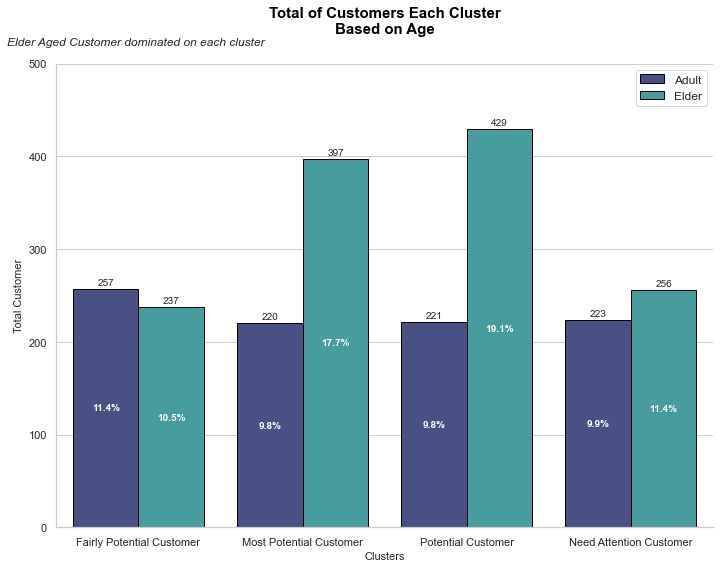

In [125]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title("Total of Customers Each Cluster\nBased on Age", fontsize=15, color='black', weight='bold', pad=30)
sns.barplot(x='Clusters', y='total_customers', data=df_age_clust, hue='Age_group', edgecolor='black', palette='mako')
plt.text(x=-0.8, y=520, s="Elder Aged Customer dominated on each cluster", fontsize=12, fontstyle='italic')
plt.xlabel('Clusters', fontsize=11)
plt.xticks(np.arange(4), ['Fairly Potential Customer', 'Most Potential Customer', 'Potential Customer', 'Need Attention Customer'], rotation=0)
plt.ylabel('Total Customer', fontsize=11)
plt.ylim(0, 500)
plt.legend(prop={'size':12}, loc='best')
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['11.4%', '9.8%', '9.8%', '9.9%'], label_type='center', color='white', weight='bold', fontsize=10)
plt.bar_label(ax.containers[1], ['10.5%', '17.7%', '19.1%', '11.4%'], label_type='center', color='white', weight='bold', fontsize=10)

sns.despine()
plt.tight_layout()

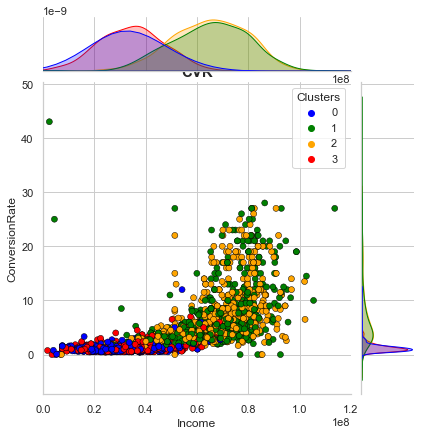

In [126]:
plot = sns.jointplot(x=df_raw['Income'], y=df_raw['ConversionRate'], hue=df_raw['Clusters'], edgecolor='black', palette=['blue','green','orange','red'])
plt.title('Income\nvs.\nCVR', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 120000000)
plt.show()

In [106]:
print('Total Spending of Champion Customer: '+str(df_raw[df_raw['Clusters']==0].TotalSpending.sum()))
print('Total Spending of Loyal Customer: '+str(df_raw[df_raw['Clusters']==1].TotalSpending.sum()))
print('Total Spending of Potential Customer: '+str(df_raw[df_raw['Clusters']==2].TotalSpending.sum()))
print('Total Spending of Need Attention Customer: '+str(df_raw[df_raw['Clusters']==3].TotalSpending.sum()))

Total Spending of Champion Customer: 37776000
Total Spending of Loyal Customer: 614752000
Total Spending of Potential Customer: 662801000
Total Spending of Need Attention Customer: 41659000


In [119]:
display(df_raw.groupby('Clusters').describe(include='all'))

ID                                                             \
           count unique top freq     mean      std    min      25%      50%   
Clusters                                                                      
0        494.000    NaN NaN  NaN 5718.126 3285.702 35.000 2717.250 5718.000   
1        617.000    NaN NaN  NaN 5726.063 3299.306  1.000 2877.000 5596.000   
2        650.000    NaN NaN  NaN 5406.580 3217.281  0.000 2755.500 5251.500   
3        479.000    NaN NaN  NaN 5541.599 3173.133  9.000 2950.000 5300.000   

                            Year_Birth                                  \
              75%       max      count unique top freq     mean    std   
Clusters                                                                 
0        8602.250 11191.000    494.000    NaN NaN  NaN 1971.836 11.330   
1        8755.000 11176.000    617.000    NaN NaN  NaN 1967.472 12.115   
2        8208.500 11171.000    650.000    NaN NaN  NaN 1966.577 11.984   
3        8144.500 11188.000    479.000    NaN NaN  NaN 1970.424 11.619   

                                                      Education             \
              min      25%      50%      75%      max     count unique top   
Clusters                                                                     
0        1893.000 1966.000 1973.000 1979.000 1996.000       494      5  S1   
1        1899.000 1958.000 1968.000 1976.000 1995.000       617      4  S1   
2        1941.000 1956.000 1967.000 1975.000 1995.000       650      5  S1   
3        1900.000 1963.000 1971.000 1979.000 1996.000       479      5  S1   

                                                 Marital_Status         \
         freq mean  std  min  25%  50%  75%  max          count unique   
Clusters                                                                 
0         225  NaN  NaN  NaN  NaN  NaN  NaN  NaN            494      6   
1         323  NaN  NaN  NaN  NaN  NaN  NaN  NaN            617      6   
2         336  NaN  NaN  NaN  NaN  NaN  NaN  NaN            650      5   
3         243  NaN  NaN  NaN  NaN  NaN  NaN  NaN            479      5   

                                                           Income             \
              top freq mean  std  min  25%  50%  75%  max   count unique top   
Clusters                                                                       
0         Menikah  209  NaN  NaN  NaN  NaN  NaN  NaN  NaN 494.000    NaN NaN   
1         Menikah  234  NaN  NaN  NaN  NaN  NaN  NaN  NaN 617.000    NaN NaN   
2         Menikah  254  NaN  NaN  NaN  NaN  NaN  NaN  NaN 650.000    NaN NaN   
3         Menikah  167  NaN  NaN  NaN  NaN  NaN  NaN  NaN 479.000    NaN NaN   

                                                                               \
         freq         mean          std         min          25%          50%   
Clusters                                                                        
0         NaN 35433907.895 31970064.937 4023000.000 25282000.000 33316000.000   
1         NaN 65403923.825 15931436.345 2447000.000 55267000.000 65526000.000   
2         NaN 65133940.000 15027519.137 7144000.000 54991000.000 65700500.000   
3         NaN 35109462.422 14590209.229 1730000.000 25400500.000 34824000.000   

                                    Kidhome                                    \
                  75%           max   count unique top freq  mean   std   min   
Clusters                                                                        
0        42122750.000 666666000.000 494.000    NaN NaN  NaN 0.777 0.492 0.000   
1        76412000.000 160803000.000 617.000    NaN NaN  NaN 0.190 0.405 0.000   
2        75917250.000 157243000.000 650.000    NaN NaN  NaN 0.191 0.423 0.000   
3        42749000.000 156924000.000 479.000    NaN NaN  NaN 0.772 0.510 0.000   

                                 Teenhome                                    \
           25%   50%   75%   max    count unique top freq  mean   std   min   
Clusters            

### **Interpreation Customer Summary** ###

**1. Fairly Potential Customer (Cluster 0)**
- There are 494 customers (22.05% of total customers) in this group
- Customers in this group have  average recency 24 days, average of total transactions 7 items and average total spending money 76,469
- This group dominated by Adult customers 11.47% (20-50 years old) have average income around 35,433,907

**2. Most Potential Customer (Cluster 1)**
- There are 617 customers (27.54% of total customers) in this group
- Customers in this group have  average recency 23 days, average of total transactions 20 items and average total spending money 996,356
- This group dominated by Elder customers 17.07% (>50 years old) have average income around 65,403,923

**3. Potential Customer (Cluster 2)**
- There are 650 customers (29.02% of total customers) in this group
- Customers in this group have  average recency 73 days, average of total transactions 20 items and average total spending money 1,019,693
- This group dominated by Elder customers 19.15% (>50 years old) have average income around 65,133,940

**4. Need Attention Customer (Cluster 3)**
- There are 479 customers (21.38% of total customers) in this group
- Customers in this group have  average recency 74 days, average of total transactions 7 items and average total spending money 86,970
- This group dominated by Elder customers 11.4% (>50 years old) have average income around 35,109,462

### **Business Recommendation** ###

**1. Fairly Potential Customer (Cluster 0)**
- Characteristic: Very active for shopping, quite high shopping intensity, spending quite much of money
- Recommendations: Give Discount/Flash Sale, Promo Bundling/Special Offer, Buy 1 Get 1 strategy
    - Example: If customers buy Coke Product with this promo, so they will get 1 free Coke
Recommendations: Vouchers/Rewards, Promo Bundling/Special Offer with Cross Selling bundling
**2. Most Potential Customer (Cluster 1)**
- Characteristic: Very active for shopping, spending quite much of money, very high shopping intensity
- Recommendations: Vouchers/Rewards,  Promo Bundling/Special Offer, Mix & Match bundling strategy
    - Example: Free to choose Coke from 3 different types/brands if meet the minimum purchase

**3. Potential Customer (Cluster 2)**
- Characteristic: Active for shopping, spending very much of money, very high shopping intensity
- Recommendations: Vouchers/Rewards, Promo Bundling/Special Offer with Cross Selling bundling
    - Example: Every purchase of Coke & Meat Products at the same time can get a 10% cheaper price

**4. Need Attention Customer**
- Characteristic: Quite active for shopping, spending quite much of money, quite high shopping intensity
- Recommendations: Discount/Flash Sale, Promo Bundling/Special Offer, Buy 1 Get 1 and Limited Edition Bundling (giving urgency sense to purchase)
    - Example: Get Coke Product promo with 55% discount at 9 AM - 11 AM only